## Dataset background

[Credit Risk Dataset](https://www.kaggle.com/datasets/laotse/credit-risk-dataset?sort=votes)

Credit To: [Lao Tse](https://www.kaggle.com/laotse)

## Objective of this analysis
* Perform EDA to understand the what features could indicate the risk of loan default
* Build a classification model to predict the potential default loans
* Use grid search for hyperparameter tuning to achieve the best performance on the random forest tree model.
* Use permutation importance to understand which features are the most critical for the overall model performance
* Use SHAP to form a better understanding how the chosen model is working to make each predictions. This is able to help us understand how the values within each feature affect the prediction. 
* Through the exercise, understand the process of credit risk analysis in banking.

## EDA

### Import Libaries and load datasets

In [1]:
pip install fancyimpute

  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 804.0/804.0 kB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 66.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 50.7 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29899 sha256=423874ba07062c182b3970da6a8f2302e01f5de7656727f19bffd5dee7f29453
  Stored in directory: /root/.cache/pip/wheels/e3/04/06/a1a7d89ef4e631ce6268ea2d8cde04f7290651c1ff1025ce68
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11353 sha256=12c49c2b517f36eae6448680eeae6dc7fd37fc4c8bbe2f7010f0a225154db6eb
  Sto

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.offline as py
py.init_notebook_mode(connected=True)

from fancyimpute import KNN

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV
from joblib import dump, load

In [4]:
import eli5
from eli5.sklearn import PermutationImportance
import shap

In [5]:
df = pd.read_csv("../input/credit-risk-dataset/credit_risk_dataset.csv", skipinitialspace = True)

### get familar with the datasets

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [7]:
df.describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99]).T

,count,mean,std,min,5%,10%,25%,50%,75%,80%,90%,95%,99%,max
person_age,32581.0,27.734600,6.348078,20.00,22.00,22.00,23.00,26.00,30.00,32.00,36.000,40.00,50.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,22880.00,28590.00,38500.00,55000.00,79200.00,86000.00,110004.000,138000.00,225200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,0.00,0.00,2.00,4.00,7.00,8.00,10.000,13.00,18.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,2000.00,3000.00,5000.00,8000.00,12200.00,14500.00,19000.000,24000.00,29800.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,6.03,6.91,7.90,10.99,13.47,13.92,15.298,16.32,18.62,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.000,1.00,1.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.04,0.05,0.09,0.15,0.23,0.25,0.320,0.38,0.50,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,2.00,2.00,3.00,4.00,8.00,9.00,11.000,14.00,17.00,30.00


In [8]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

There are two columns that contain missing values, we will think about how to deal with them later

**Note** For our purpose, the loan status column will be the target variable and other columns could be used as features for classification

In [9]:
df_num = df.select_dtypes(include='number')
print(f"There are total {df_num.shape[1]} numerical variables to use")
print(f"Those numerical columns are: {df_num.columns.tolist()}")
df_cat = df.select_dtypes(include=['object','category'])
print(f"There are total {df_cat.shape[1]} numerical variables to use")
print(f"Those categorical columns are: {df_cat.columns.tolist()}")

There are total 8 numerical variables to use
Those numerical columns are: ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']
There are total 4 numerical variables to use
Those categorical columns are: ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


### Look Deeper at Target Variable

#### stats about target variable itself

In [10]:
df["loan_status"].describe()

count    32581.000000
mean         0.218164
std          0.413006
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loan_status, dtype: float64

<AxesSubplot:ylabel='loan_status'>

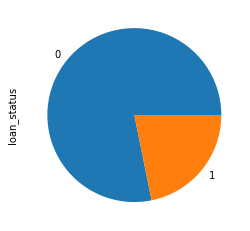

In [11]:
df["loan_status"].value_counts().plot.pie()

**Note** We have more non-default loan than default loans in the dataset, this could require some work to aviod potential issues related to unbalance dataset. 

### visualize the relationship of a few features and the target value

#### person income

<AxesSubplot:>

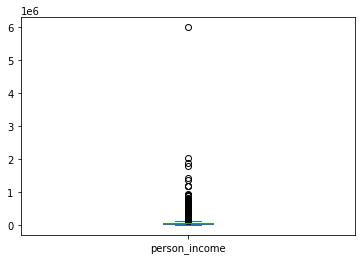

In [12]:
df['person_income'].plot.box()

<AxesSubplot:ylabel='Frequency'>

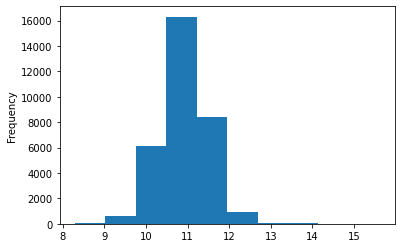

In [13]:
np.log(df['person_income']).plot.hist()

In [14]:
df['log_income'] = np.log(df['person_income'])

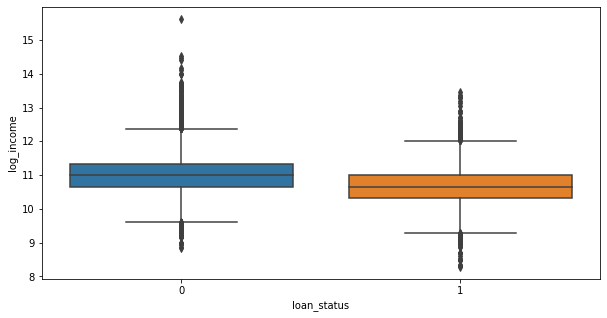

In [15]:
## take a look at the distribution of person income with different loan status
f, ax = plt.subplots(figsize = (10, 5))
sns.boxplot(x = 'loan_status', y='log_income', data = df[['loan_status', 'log_income']])
df = df.drop('log_income', axis = 1)

**Note** We are able to see the persons who have no default loans have a higher income than the ones who have a default loan.

#### Employee length

<AxesSubplot:xlabel='person_emp_length'>

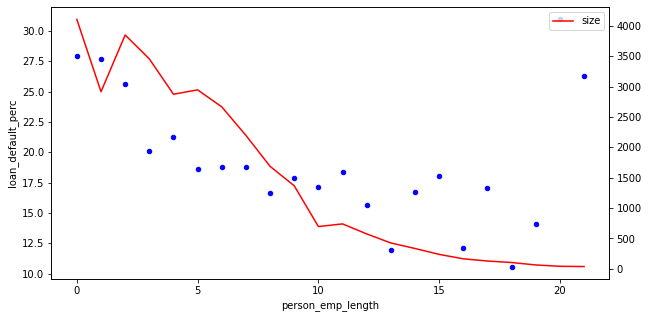

In [16]:
df_emp_length = df.groupby('person_emp_length', as_index=False)['loan_status'].sum().merge(df.groupby('person_emp_length', as_index=False).size())
df_emp_length['loan_default_perc'] = df_emp_length['loan_status'] / df_emp_length['size']*100
df_emp_length = df_emp_length[df_emp_length['size']>30]
fig, ax = plt.subplots(figsize = (10, 5))
df_emp_length.plot.scatter(x = 'person_emp_length', y='loan_default_perc', ax = ax, c = 'blue')
ax1 = plt.twinx()
df_emp_length.plot.line(x = 'person_emp_length', y='size', ax = ax1, c = 'red')

**Note** With the data we have, we see that the employee length and the loan default percentage among the group have a negative correlationship

### corelation with target value

In [17]:
# First, encode categorical features, use one hot encoding here 
df = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent','loan_grade', 'cb_person_default_on_file'])

In [18]:
corr = df.corr()['loan_status'].sort_values(ascending=False)
fig = px.bar(x = corr.keys(), y = corr.values, title = 'correlation with target value',
            labels = {'x':'Features', 'y': 'Correlation'})
fig.show()

### Feature Engineering

#### Fill missing values

In [19]:
df

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,0,0,...,0,0,0,0,1,0,0,0,0,1
1,21,9600,5.0,1000,11.14,0,0.10,2,0,0,...,0,0,1,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,1,0.57,3,1,0,...,0,0,0,1,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,0,0,0,1,0,0,0,0,1,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30,1,0,...,0,0,0,1,0,0,0,0,1,0
32577,54,120000,4.0,17625,7.49,0,0.15,19,1,0,...,0,1,0,0,0,0,0,0,1,0
32578,65,76000,3.0,35000,10.99,1,0.46,28,0,0,...,0,0,1,0,0,0,0,0,1,0
32579,56,150000,5.0,15000,11.48,0,0.10,26,1,0,...,0,0,1,0,0,0,0,0,1,0


In [20]:
knn_imputer = KNN()
filled_data = knn_imputer.fit_transform(df)

Imputing row 1/32581 with 0 missing, elapsed time: 258.872
Imputing row 101/32581 with 0 missing, elapsed time: 258.875
Imputing row 201/32581 with 0 missing, elapsed time: 258.878
Imputing row 301/32581 with 0 missing, elapsed time: 258.880
Imputing row 401/32581 with 0 missing, elapsed time: 258.882
Imputing row 501/32581 with 0 missing, elapsed time: 258.885
Imputing row 601/32581 with 1 missing, elapsed time: 258.887
Imputing row 701/32581 with 0 missing, elapsed time: 258.890
Imputing row 801/32581 with 0 missing, elapsed time: 258.893
Imputing row 901/32581 with 0 missing, elapsed time: 258.897
Imputing row 1001/32581 with 0 missing, elapsed time: 258.899
Imputing row 1101/32581 with 0 missing, elapsed time: 258.901
Imputing row 1201/32581 with 0 missing, elapsed time: 258.903
Imputing row 1301/32581 with 0 missing, elapsed time: 258.905
Imputing row 1401/32581 with 0 missing, elapsed time: 258.907
Imputing row 1501/32581 with 0 missing, elapsed time: 258.910
Imputing row 1601/32

In [21]:
df = pd.DataFrame(filled_data, columns = df.columns)

In [22]:
df.isnull().sum()

person_age                        0
person_income                     0
person_emp_length                 0
loan_amnt                         0
loan_int_rate                     0
loan_status                       0
loan_percent_income               0
cb_person_cred_hist_length        0
person_home_ownership_MORTGAGE    0
person_home_ownership_OTHER       0
person_home_ownership_OWN         0
person_home_ownership_RENT        0
loan_intent_DEBTCONSOLIDATION     0
loan_intent_EDUCATION             0
loan_intent_HOMEIMPROVEMENT       0
loan_intent_MEDICAL               0
loan_intent_PERSONAL              0
loan_intent_VENTURE               0
loan_grade_A                      0
loan_grade_B                      0
loan_grade_C                      0
loan_grade_D                      0
loan_grade_E                      0
loan_grade_F                      0
loan_grade_G                      0
cb_person_default_on_file_N       0
cb_person_default_on_file_Y       0
dtype: int64

## Build models

In [23]:
X ,y = df.drop('loan_status', axis = 1), df['loan_status']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

**Logistic Regression**

In [24]:
model = LogisticRegression()
model.fit(train_X, train_y)
y_pred = model.predict(test_X)

print('the model accuracy score is ', accuracy_score(test_y, y_pred))
print(f'the model f1 score is {f1_score(test_y, y_pred)}\nwhere recall score is {recall_score(test_y, y_pred)} and precision score is {precision_score(test_y, y_pred)}')

the model accuracy score is  0.7982200398956575
the model f1 score is 0.2507122507122507
where recall score is 0.1510989010989011 and precision score is 0.7357859531772575


**Random Forest Classification**

In [25]:
model = RandomForestClassifier(n_estimators = 50, random_state = 42)

model.fit(train_X, train_y)
y_pred = model.predict(test_X)

print('the model accuracy score is ', accuracy_score(test_y, y_pred))
print(f'the model f1 score is {f1_score(test_y, y_pred)}\nwhere recall score is {recall_score(test_y, y_pred)} and precision score is {precision_score(test_y, y_pred)}')

the model accuracy score is  0.9350928341261316
the model f1 score is 0.8344422700587084
where recall score is 0.7321428571428571 and precision score is 0.9699727024567789


**Notes** We are able to achieve over 93% accuracy for the classification with recall rate over 73% and precision rate over 97% using the random forest model. It has a significant increase on the performance comparing to the linear model.

### Use Grid Seach to fine tune the hyperparameters

Since we are able to easily achieve a much better results using default random forest model, we will further tune the parameters to achieve the best performance

Here are some common hyperparameters for fine tuning:

* n_estimators = number of trees in the foreset
* max_features = max number of features considered for splitting a node
* max_depth = max number of levels in each decision tree
* min_samples_split = min number of data points placed in a node before the node is split
* min_samples_leaf = min number of data points allowed in a leaf node
* bootstrap = method for sampling data points (with or without replacement)

In [26]:
params = {
    'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 300, num = 20)],
    'max_depth':[20, 40, 60, 80, 100, None],
}
rf = RandomForestClassifier()
rf_grid = GridSearchCV(estimator = rf, param_grid = params, cv = 5, verbose = 2, n_jobs = -1)
rf_grid.fit(train_X, train_y)
print(f"The best hyperparameters to use for the random forest model is {rf_grid.best_params_}")
best_rf = rf_grid.best_estimator_

# save the model
dump(best_rf, '/kaggle/working/best_rf.joblib')

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] END ......................max_depth=20, n_estimators=10; total time=   0.4s
[CV] END ......................max_depth=20, n_estimators=10; total time=   0.4s
[CV] END ......................max_depth=20, n_estimators=25; total time=   1.0s
[CV] END ......................max_depth=20, n_estimators=40; total time=   1.6s
[CV] END ......................max_depth=20, n_estimators=55; total time=   2.4s
[CV] END ......................max_depth=20, n_estimators=71; total time=   2.8s
[CV] END ......................max_depth=20, n_estimators=71; total time=   2.8s
[CV] END ......................max_depth=20, n_estimators=86; total time=   3.3s
[CV] END .....................max_depth=20, n_estimators=101; total time=   3.9s
[CV] END .....................max_depth=20, n_estimators=116; total time=   5.1s
[CV] END .....................max_depth=20, n_estimators=132; total time=   5.2s
[CV] END .....................max_depth=20, n_

['/kaggle/working/best_rf.joblib']

In [27]:
def evaluate(model, test_X, test_y):
    y_pred = model.predict(test_X)
    print("Model Performance")
    accuracy = accuracy_score(test_y, y_pred)
    f1 = f1_score(test_y, y_pred)
    print('the model accuracy score is ', accuracy)
    print(f'the model f1 score is {f1}')
    return accuracy, f1

base_model = RandomForestClassifier(n_estimators = 50, random_state = 42)
base_model.fit(train_X, train_y)
base_accuracy, base_f1 = evaluate(base_model, test_X, test_y)

grid_accuracy, grid_f1 = evaluate(best_rf, test_X, test_y)

improve_accuracy = (grid_accuracy - base_accuracy) / base_accuracy * 100
improve_f1 = (grid_f1 - base_f1) / base_f1 * 100
print(f"Improvement of {round(improve_accuracy, 6)}% on the accuracy and {round(improve_f1, 6)}% on the f1 score")


Model Performance
the model accuracy score is  0.9350928341261316
the model f1 score is 0.8344422700587084
Model Performance
the model accuracy score is  0.9361669479822003
the model f1 score is 0.836734693877551
Improvement of 0.114867% on the accuracy and 0.274725% on the f1 score


## Model Explainability

#### Comparison between permutaion importance and SHAP importance

**Permutation importance**
Permutation importance is calculated on the entire dataset and measure how much the accuracy of the whole dataset changes by eliminating a feature. 

It can be used to:
* Understand which features to keep and which to exclude.
* Check for data leakage
* Understand what features are most important to model accuracy
* Guide additional feature engineering

**SHAP importance**
SHAP importance is calculated on row level and can be used to understand what is important to a specific row. The values represent how a feature influences the prediction of a single row relative to the average outcome in the dataset. 

It can be used to:
* Understand which features most influence the predicted outcome. 
* Dive into a feature and understand how the different values of that feature affect the prediction.
* Understand what is most influential on individual rows or subsets within the data.

**Key Differences**
* Permutation importance can only measure the importance of features to the entire dataset, not in specific rows. SHAP importance can be used to see the feature importance in a row level.
* Permutation importance does not include a direction which SHAP importance can be directional.
* The magnitude of the SHAP importance can be used to understand how the values within a feature influence the outcome, while Permutation importance values are used to estimate how important the feature is to the whole dataset. 

In [28]:
# use permutation improtance to show the weights of each features to give us a summarized view
perm = PermutationImportance(best_rf, random_state = 1).fit(train_X, train_y)
eli5.show_weights(perm, feature_names = train_X.columns.tolist())

Weight,Feature
0.1268 ± 0.0016,loan_percent_income
0.0808 ± 0.0012,person_income
0.0761 ± 0.0029,person_home_ownership_RENT
0.0492 ± 0.0012,loan_int_rate
0.0457 ± 0.0014,person_emp_length
0.0396 ± 0.0017,loan_grade_D
0.0352 ± 0.0010,loan_amnt
0.0260 ± 0.0006,person_age
0.0243 ± 0.0004,loan_intent_MEDICAL
0.0235 ± 0.0009,loan_intent_DEBTCONSOLIDATION


**Permutation Importance Conclusion**

In the permutation importance table, we can see which features have the biggest impact on the overall model accuracy. Based on the importance rank, we can perform feature selection to reduce the dimension of the dataset if we do not have sufficient dataset size and worry about overfitting issue.


[CV] END ....................max_depth=100, n_estimators=132; total time=   5.5s
[CV] END ....................max_depth=100, n_estimators=147; total time=   5.9s
[CV] END ....................max_depth=100, n_estimators=162; total time=   6.6s
[CV] END ....................max_depth=100, n_estimators=162; total time=   6.6s
[CV] END ....................max_depth=100, n_estimators=177; total time=   7.1s
[CV] END ....................max_depth=100, n_estimators=193; total time=   8.3s
[CV] END ....................max_depth=100, n_estimators=208; total time=   8.3s
[CV] END ....................max_depth=100, n_estimators=223; total time=   8.8s
[CV] END ....................max_depth=100, n_estimators=223; total time=   8.9s
[CV] END ....................max_depth=100, n_estimators=238; total time=  10.1s
[CV] END ....................max_depth=100, n_estimators=254; total time=  10.3s
[CV] END ....................max_depth=100, n_estimators=269; total time=  11.0s
[CV] END ..................

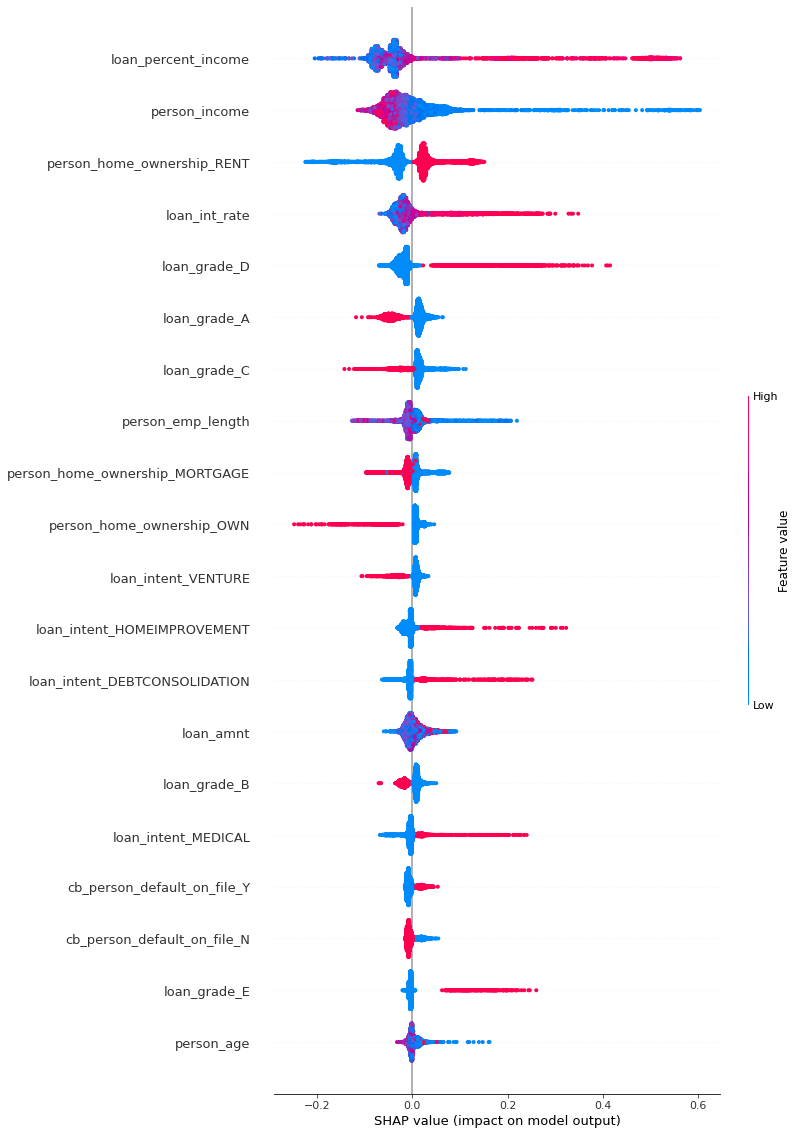

In [29]:
# use SHAP (SHapley Additive exPlanations) to understand the model 
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(test_X)

# how model is predicting loan default (loan_status = 1)
shap.summary_plot(shap_values[1], test_X, plot_size=(10, 20))

**SHAP Importance Conclution**

In the shap chart, we are able to see how each features are contributing to the final prediction of loan default. As we can see that each feature are contributing in a way that makes business sense. 

For example: 
* a person who rents (person_home_ownership_RENT = 1) shows higher chance of loan default. 
* loan with grade A (loan_grade_A = 1) has smaller chance of loan default. 
* higher personal income (person_income) shows a smaller chance of loan default. 

## Main Takeaway from a business perspectie

* A person's annual income, employment history length, loan grade and credit history length have negative relationship with the risk of loan default. The higher annual income, the longer the employment length, higher loan grade or longer credit hisotry a person has, the less likely of a loan default might happen for that person. 
* The loan's interest rate and loan percent income have positive relationship with the risk of loan default. The higher a loan's interest rate or higher the loan percent income ratio is, the loan will have higher risk of loan default. 
* A person's age and loan amount are not seem to have a strong correlation with the potential loan default risk. 
* In addtion, there are other factors that can differentiate a person with higher risk of loan default and the ones with lower risk:
    1. Having a home or mortage could indicate a lower loan default risk comparing to the ones who rents;
    2. Different types of loans could associate different level of loan default risks;
    3. Having a default on file could indicate a higher loan default risk comparing to the ones without any default on files.